In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 통계 프로그램 패키지 가져오기 
from scipy.stats import chisquare 
from scipy import stats 
import scipy as sp 

import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm 

In [6]:
path = 'spstat1.csv'

In [7]:
pd.read_csv(path, encoding='euc-kr', sep=',')
# unicode error >> encoding 

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1


In [8]:
raw = pd.read_csv(path, encoding='euc-kr', sep=',')

df = raw.copy()

In [9]:
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [10]:
df.shape 

(252, 29)

In [11]:
df.dtypes

번호             int64
사용브랜드          int64
사용기간           int64
구매장소           int64
구매가격           int64
정보획득           int64
구입조언           int64
하루사용시간         int64
브랜드이미지         int64
가격만족도          int64
재구매의향          int64
구매중요도1_메모리     int64
구매중요도2_배터리     int64
구매중요도3_카메라     int64
구매중요도4_처리속도    int64
구매중요도5_보안기능    int64
구매중요도6_운영체계    int64
구매중요도7_디자인     int64
구매중요도8_음질      int64
구매중요도9_A/S     int64
구매중요도10_명성     int64
성별             int64
연령             int64
연령2            int64
학력             int64
직업             int64
월수입            int64
결혼             int64
가족수            int64
dtype: object

In [12]:
df['구매장소']

0      1
1      3
2      1
3      3
4      5
      ..
247    5
248    5
249    1
250    1
251    2
Name: 구매장소, Length: 252, dtype: int64

In [13]:
df.구매장소

0      1
1      3
2      1
3      3
4      5
      ..
247    5
248    5
249    1
250    1
251    2
Name: 구매장소, Length: 252, dtype: int64

In [14]:
df.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [15]:
df.columns[[1,4,5]]

Index(['사용브랜드', '구매가격', '정보획득'], dtype='object')

In [16]:
df[df.columns[[1,4,5]]]

,사용브랜드,구매가격,정보획득
0,1,15,1
1,1,20,4
2,1,25,1
3,1,26,4
4,1,30,6
...,...,...,...
247,2,200,6
248,2,200,6
249,2,200,2
250,2,200,2


In [17]:
# loc 

df.loc[:, '학력':"결혼"] # 결혼까지 포함 

,학력,직업,월수입,결혼
0,2,4,2,2
1,4,4,4,2
2,4,7,4,2
3,2,2,5,3
4,4,9,2,1
...,...,...,...,...
247,7,8,2,1
248,6,4,6,2
249,6,4,3,2
250,2,1,2,1


In [18]:
# iloc 

df.iloc[1:7, 2:5]

,사용기간,구매장소,구매가격
1,3,3,20
2,2,1,25
3,5,3,26
4,3,5,30
5,1,4,30
6,5,2,40


In [19]:
df[:6]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3


In [20]:
df.at[5, "구매가격"]

30

In [21]:
# 구매가격이 50 미만인 값 추출 

df['구매가격'] < 50 

0       True
1       True
2       True
3       True
4       True
       ...  
247    False
248    False
249    False
250    False
251    False
Name: 구매가격, Length: 252, dtype: bool

In [22]:
df[df['구매가격'] < 50 ]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [23]:
condition = df['구매가격'] < 50 
df[condition]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [24]:
# 구매가격이 150초과, 200미만 값 표시 

condition = (df['구매가격'] > 150) & (df['구매가격']<200)
df[condition]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
233,206,2,3,4,160,6,1,5,3,1,...,3,3,1,2,1,5,8,1,1,3
234,140,2,3,4,170,6,3,5,1,2,...,1,2,1,3,2,4,2,5,1,4
235,128,2,5,4,180,6,4,3,4,5,...,5,3,1,6,3,1,9,3,3,2
236,25,2,3,5,180,6,5,3,3,3,...,4,4,1,4,2,6,4,5,1,4
237,149,2,2,3,182,6,2,5,2,3,...,3,4,1,3,2,4,4,6,2,2
238,244,2,4,1,190,5,5,2,3,5,...,4,2,0,5,3,4,4,2,2,4
239,90,2,3,2,190,6,2,2,2,4,...,4,5,0,4,2,4,4,5,1,4


In [25]:
df_copy = df.copy()

In [26]:
df_copy.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

기초통계

In [27]:
# 요약통계 
# BIG 5 (평균, 중위수, 최대-최소값, 사분위수)

df_copy['구매가격'].describe()

count    252.000000
mean     101.226190
std       38.654982
min       10.000000
25%       80.000000
50%      100.000000
75%      120.000000
max      250.000000
Name: 구매가격, dtype: float64

In [28]:
# 첨도 (kurtosis)

df['구매가격'].kurtosis()

1.3613500036652209

In [29]:
# 왜도 (skew)

df['구매가격'].skew()

0.8074518614845148

In [30]:
df['사용브랜드'].value_counts()

사용브랜드
1    127
2    125
Name: count, dtype: int64

In [31]:
from matplotlib import font_manager, rc, rcParams

rc('font', family = 'Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

In [32]:
import platform 

# 운영체제 확인 
system = platform.system()

# 한글폰트 설정 

if system == 'Darwin': # mac-os
  plt.rc('font', family = 'AppleGothic')
elif system == 'Windows': #windos os 
  plt.rc('font', family = 'Malgun Gothic')
else: # linux
  plt.rc('font', family = 'NanumGothic')
  
# 마이너스 기호(-) 깨짐 방지 
plt.rc('axes', unicode_minus=False)

In [33]:
%matplotlib inline 

df['사용브랜드'].replace([1,2],['삼성','애플'])

0      삼성
1      삼성
2      삼성
3      삼성
4      삼성
       ..
247    애플
248    애플
249    애플
250    애플
251    애플
Name: 사용브랜드, Length: 252, dtype: object

In [34]:
df['사용브랜드'].replace([1,2],['삼성','애플']).value_counts()

사용브랜드
삼성    127
애플    125
Name: count, dtype: int64

In [35]:
# 한글 깨짐 방지

# 나눔폰트 설치

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [36]:
import matplotlib as mpl # 기본 설정 만지는 용도 
import matplotlib.pyplot as plt # 그래프 그리는 용도 
import matplotlib.font_manager as fm # 폰트 관련 용도 


print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.8.4
c:\Python312\Lib\site-packages\matplotlib\__init__.py
C:\Users\taeyoung\.matplotlib
C:\Users\taeyoung\.matplotlib


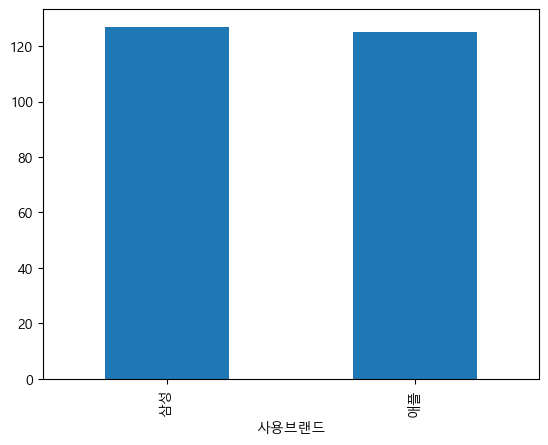

In [37]:
df['사용브랜드'].replace([1,2],['삼성','애플']).value_counts().plot(kind='bar')
plt.show()

In [38]:
df['성별'].value_counts()

성별
0    126
1    126
Name: count, dtype: int64

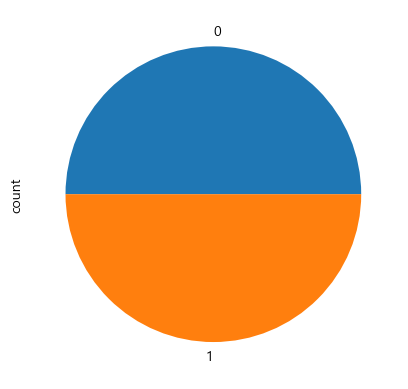

In [39]:
df['성별'].value_counts().plot(kind='pie')
plt.show()

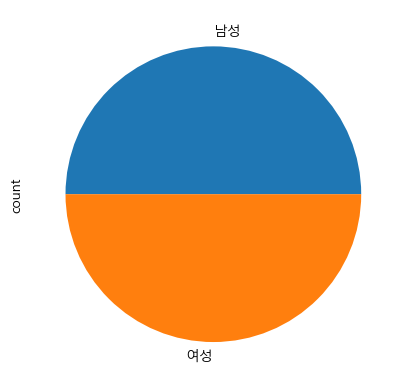

In [40]:
df['성별'].replace([0,1],["남성","여성"]).value_counts().plot(kind='pie')
plt.show()

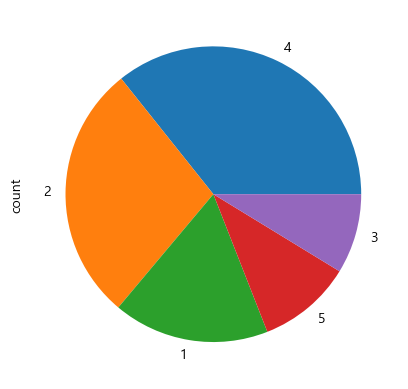

In [41]:
df['구매장소'].value_counts().plot(kind='pie')
plt.show()

In [42]:
# 교차 분석 

pd.crosstab(df['월수입'],df['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [43]:
# 카이제곱 분석
# 1) c : degree of freedom(자유도)
# 2) o : observed value(관측치)
# 3) e : expected value(기대치)

# chisquare(df['월수입'], df['사용브랜드'])

import numpy as np 

fobs = df.월수입       # 관찰 빈도수 
fexp = df.사용브랜드   # 기대 빈도수 


fexp = fexp * (np.sum(fobs) / np.sum(fexp) )

chisquare(f_obs=fobs, f_exp=fexp )


# pvalue=9.618060771117479e-05 (< 0.05 (5%) alpha 유의수준)
# p-value 가 유의수준 alpha (=0.05)보다 작고 0에 가까우기 때문에 유효함 
# 고로, 귀무가설이 기각 >> 연구가설 채택 

Power_divergenceResult(statistic=343.26420150053593, pvalue=9.6180607711175e-05)

In [44]:
import numpy as np

fobs = np.array([10,20])
fexp = np.array([30,60])

fexp = fexp * (np.sum(fobs)/np.sum(fexp))

chisquare(f_obs=fobs, f_exp=fexp )

# pvalue=1.0 >> 전혀 유효하지 않다.

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [45]:
pd.crosstab(df['구매장소'], df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [46]:
chisquare(df['구매장소'])

Power_divergenceResult(statistic=148.31174089068827, pvalue=0.9999999645077914)

In [49]:
chisquare(df['구매장소'], ddof=[0,1])

# ddof = [0,1] : degree of freedom (자유도) 보정한 값
# 범주표 행 차원에서 1을 빼고 , 열차원은 변경하지 않음


Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

In [50]:
chisquare(df['월수입'], ddof = [0,1])

Power_divergenceResult(statistic=196.2733118971061, pvalue=array([0.99555742, 0.99491356]))

In [52]:
# T 검정
# 2개의 독립변인(남성/여성, 삼성/애플) 평균차이 비교

df['구매가격'].values

array([ 15,  20,  25,  26,  30,  30,  40,  40,  40,  40,  40,  45,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  60,  60,  60,  60,
        60,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  72,  75,  75,  75,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  85,
        89,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  95,  99, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 130, 130, 130, 150,  10,  48,  50,
        50,  70,  70,  70,  70,  75,  80,  80,  80,  80,  89,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [57]:
mean = df['구매가격'].values

mean1 = df[df['사용브랜드'] == 1].구매가격.values
mean2 = df[df['사용브랜드'] == 2].구매가격.values

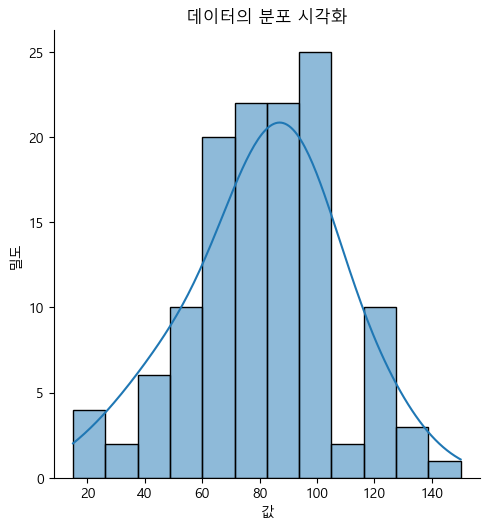

In [63]:
from IPython.core.prefilter import PrefilterChecker
%matplotlib inline

sns.displot(mean1,  kde=True, kde_kws={'bw_adjust': 1.5})

plt.title('데이터의 분포 시각화')
plt.xlabel('값')
plt.ylabel('밀도')
plt.show()

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_13200\2359887723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean1,  kde=True, fit=sp.stats.norm)
C:\Users\taeyoung\AppData\Local\Temp\ipykernel_13200\2359887723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean2,  kde=True, fit=sp.st

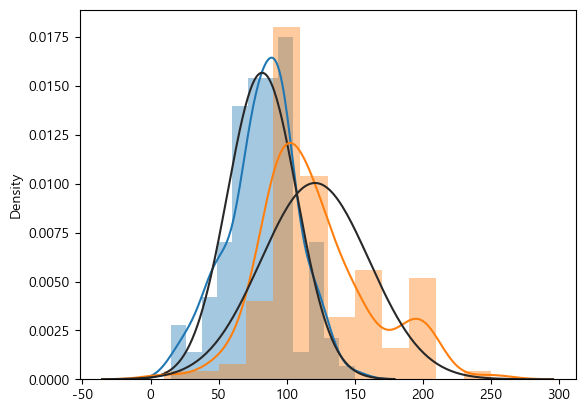

In [68]:
sns.distplot(mean1,  kde=True, fit=sp.stats.norm)
sns.distplot(mean2,  kde=True, fit=sp.stats.norm)


# kde : kernel density estimation
plt.show()

In [70]:
# 정규성 검정 테스트 shapiro test

print(sp.stats.shapiro(mean1))
print()
print(sp.stats.shapiro(mean2))

# shapiro-wilk test(정규성 검정 테스트)

# H0(영가설, 귀무가설), Ha(연구가설, 대립가설)
# 가설 : hypothesis

# H0 : normal distribution (정규분포)를 따르다.

# 결과해석
# ShapiroResult(statistic=0.9720974683761938, pvalue=0.009972049986942013)
# mean1 의 p-value < 0.05 >> 귀무가설 기각, 연구가설 채택
# 귀무가설인 '정규 분포 따른다' 기각

# ShapiroResult(statistic=0.925287048685832, pvalue=3.2922330107496315e-06)
# mean2 의 p-value < 0.05 >> 귀무가설 기각, 연구가설 채택
# 귀무가설인 '정규 분포 따른다' 기각

ShapiroResult(statistic=0.9720974683761938, pvalue=0.009972049986942013)

ShapiroResult(statistic=0.925287048685832, pvalue=3.2922330107496315e-06)


In [71]:
# 등분산 가정 (르벤 테스트)
# H0(귀무가설) : 두 집단의 분산은 같다

sp.stats.levene(mean1, mean2)
# pvalue=0.00030027808643847813 (< 0.05)
# 귀무가설 기각 >> 등분산 가정 위배

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643847813)

In [73]:
# 독립표본 T - TEST (Independent 2 sample t-test)

stats.ttest_ind(mean1, mean2, equal_var= False)

# 르벤 테스트 결과 등분산 가정 결과를 반영
# equal_var = True : 등분산 가정
# equal_var = False : 등분산 가정 위배

# pvalue=3.598124628532717e-17 ( < 0.05)
# 귀무가설('두 집단의 차이가 없다') 기각 >> 두 집단간 차이가 있다.

TtestResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17, df=210.54390737951886)

In [75]:
df['재구매의향'].values

array([3, 3, 2, 5, 3, 2, 5, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 4, 3,
       5, 3, 2, 3, 3, 2, 5, 1, 3, 2, 3, 3, 5, 2, 3, 3, 3, 2, 1, 1, 4, 2,
       1, 3, 5, 4, 1, 2, 2, 4, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 2, 3, 5, 1,
       4, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 5, 3, 1, 4, 3, 4, 1, 3, 5, 1, 3,
       5, 3, 5, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 5, 1, 1, 3, 3,
       3, 3, 1, 1, 2, 5, 5, 5, 1, 1, 3, 1, 1, 4, 4, 3, 1, 1, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 5, 2, 5, 2, 2, 1, 2, 1, 2, 2, 3,
       3, 3, 5, 5, 5, 4, 5, 4, 2, 3, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 3, 3,
       1, 2, 2, 3, 1, 4, 3, 2, 2, 2, 2, 5, 5, 4, 5, 3, 4, 2, 3, 2, 3, 3,
       3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 3, 3, 1, 4, 4, 4, 5, 3, 1, 2, 2, 2,
       5, 5, 2, 1, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2, 2, 5, 3, 2, 4, 3, 4, 5,
       4, 3, 2, 3, 2, 3, 3, 4, 3, 3], dtype=int64)

In [80]:
mean = df['재구매의향'].values

mean1 = df[df['사용브랜드'] == 1].재구매의향.values
mean2 = df[df['사용브랜드'] == 2].재구매의향.values

In [82]:
# 정규성 검정테스트
print(sp.stats.shapiro(mean1))
print()
print(sp.stats.shapiro(mean2))

# 결과해석
# pvalue=7.541228420297649e-08
# pvalue=5.994924469785666e-08
# 귀무가설 : 두 집단의 평균은 정규성을 띈다. >> 기각
# 정규성 검정결과, 정규성을 띄지 않음.

ShapiroResult(statistic=0.8974908294133357, pvalue=7.541228420297649e-08)

ShapiroResult(statistic=0.8939255486215134, pvalue=5.994924469785666e-08)


In [84]:
# 등분산 가정(르벤 테스트)
sp.stats.levene(mean1, mean2)

# pvalue=0.7315465812585968 > 0.05
# 귀무가설(두 집단의 분산은 같다) 기각 못함.
# >> 등분산 가정 충족

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585968)

In [85]:
# 독립표본 T-test

stats.ttest_ind(mean1, mean2, equal_var = True)

TtestResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513, df=250.0)

In [88]:
# 분산 분석(ANOVA)
# >> 3집단 이상 평균 차이 분석


# 연령2 : 3집단으로 연령대 (10대, 20대, 30대....)
# 요인분석 : 공통성을 기준, 요인별로 묶는 것

anova1 = df[df['연령2'] == 1].재구매의향.values
anova2 = df[df['연령2'] == 2].재구매의향.values
anova3 = df[df['연령2'] == 3].재구매의향.values

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_13200\2812847832.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1, kde=False, fit=sp.stats.norm)
C:\Users\taeyoung\AppData\Local\Temp\ipykernel_13200\2812847832.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2, kde=False, fit=sp.

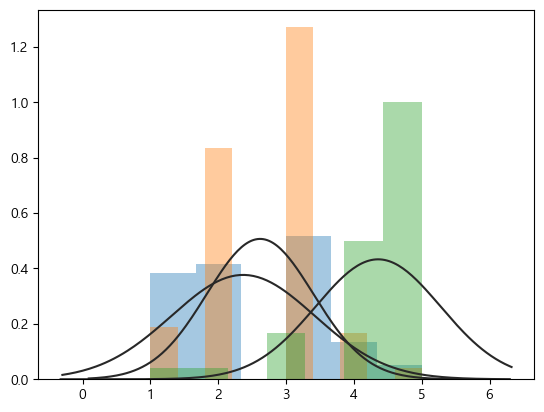

In [92]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)
plt.show()

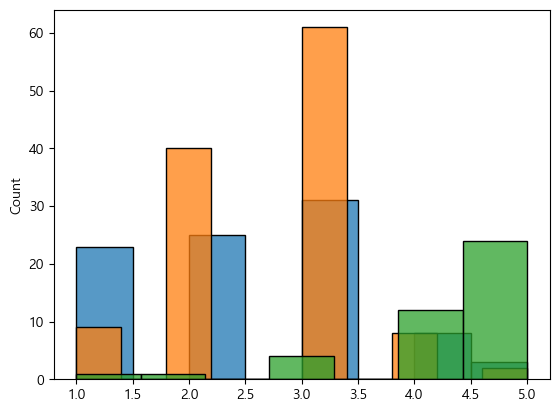

In [100]:
sns.histplot(anova1, kde=False)
sns.histplot(anova2, kde=False)
sns.histplot(anova3, kde=False)

plt.show()

In [103]:
stats.f_oneway(anova1, anova2, anova3)
# pvalue=1.6136860224263927e-25
# H0 : 세 집단 간 평균의 차이는 없다.
# 귀무가설 기각 >> 연구가설 채택
# >> 적어도 한 집단은 평균의 차이가 있다.
# ex) anova1 = anova2 != anova3
# 세 집단 간 모두 차이가 있다고 말할 수가 없다.
# 사후 테스트 필요 

F_onewayResult(statistic=72.42612494637737, pvalue=1.6136860224263927e-25)

In [107]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['재구매의향'],      # 데이터
                  groups = df['연령2'],                 # 그룹 
                  alpha = 0.05                          # 유의수준 (alpha 값)
                  )

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1276,-0.0526,0.5526,False
1,3,1.9905,0.0,1.585,2.396,True
2,3,1.7405,0.0,1.3514,2.1295,True


In [112]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['재구매의향'],      # 데이터
                  groups = df['연령2'],                 # 그룹 
                  alpha = 0.05                          # 유의수준 (alpha 값)
                  )

tukey_result_summary = tukey.summary()
print(tukey_result_summary)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     0.25 0.1276 -0.0526 0.5526  False
     1      3   1.9905    0.0   1.585  2.396   True
     2      3   1.7405    0.0  1.3514 2.1295   True
---------------------------------------------------


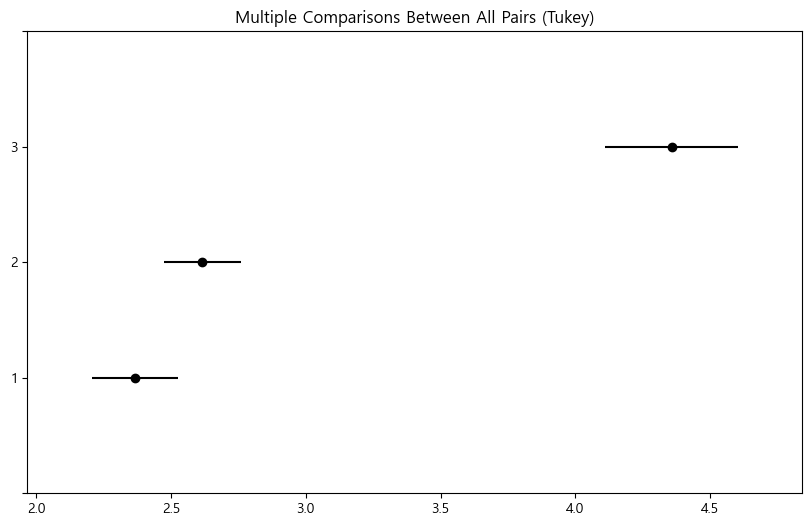

In [110]:
# 튜키의 동시적 비교를 시각화
tukey.plot_simultaneous()

plt.vlines(x=49.57, ymin=0.5, ymax=4.5, color='red')
plt.show()

In [111]:
# 연령에 따른 구매 가격 추이

anova1 = df[df['연령2'] == 1].구매가격.values
anova2 = df[df['연령2'] == 2].구매가격.values
anova3 = df[df['연령2'] == 3].구매가격.values

In [114]:
stats.f_oneway(anova1, anova2, anova3)

# pvalue=0.4424501442269154 > 0.05
# 귀무가설 기각하지 못함 >>> 3 집단간 차이 없음

F_onewayResult(statistic=0.8181036982598708, pvalue=0.4424501442269154)

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_13200\1638655053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova1, kde=False, fit=sp.stats.norm)
C:\Users\taeyoung\AppData\Local\Temp\ipykernel_13200\1638655053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anova2, kde=False, fit=sp.

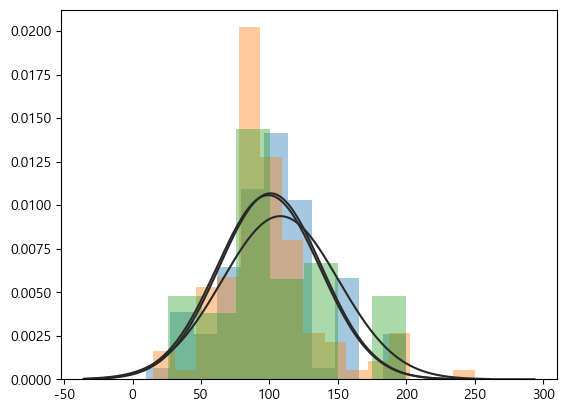

In [115]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)

plt.show()

In [116]:
# 상관분석

sp.stats.pearsonr(df['재구매의향'],df['구입조언'])

PearsonRResult(statistic=0.41783620648818537, pvalue=4.546075388272578e-12)

In [117]:
df.corr(method='pearson')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-1.080086e-02,-0.038587,-3.437524e-03,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,7.936758e-03,0.035986,2.056873e-02,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,2.095292e-02,0.289194,2.802837e-01,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,1.116104e-01,0.063064,3.949891e-02,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,5.441430e-02,0.026217,4.756285e-02,0.102732,-0.021546,0.140954,0.010288,0.031466
정보획득,-0.051147,-0.056471,-0.041385,0.154155,0.036478,1.000000,0.044041,0.036552,-0.109654,0.001379,...,0.031857,0.084373,2.084692e-01,-0.028481,-5.093567e-02,-0.030649,0.040337,0.024921,-0.008287,0.110201
구입조언,-0.050270,-0.022794,0.163995,0.129688,0.166607,0.044041,1.000000,0.152128,0.255051,0.365651,...,0.315692,0.199148,9.656477e-02,0.623919,6.405167e-01,0.202405,-0.178018,0.203266,0.243664,-0.011434
하루사용시간,0.016985,-0.023418,-0.031484,0.096426,0.162502,0.036552,0.152128,1.000000,-0.045647,0.050846,...,0.019810,0.010031,-6.277929e-02,0.033098,2.471600e-02,0.225983,0.023726,0.107988,-0.087184,0.085902
브랜드이미지,0.136440,-0.086466,0.364656,-0.112618,0.016474,-0.109654,0.255051,-0.045647,1.000000,0.512966,...,0.240870,0.141335,-7.046798e-03,0.300457,3.383337e-01,0.089793,-0.023346,0.113624,0.121006,0.029519
가격만족도,0.078784,-0.048290,0.275456,-0.101271,0.121168,0.001379,0.365651,0.050846,0.512966,1.000000,...,0.283316,0.218231,-8.536627e-02,0.494699,5.186812e-01,0.057481,0.015575,0.137864,0.307197,0.079693


In [119]:
ols(formula = '재구매의향 ~성별 + 연령+ 학력+ 월수입+사용기간+ 구매가격+구입조언 +\
    브랜드이미지+가격만족도+하루사용시간',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     56.03
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.09e-57
Time:                        11:51:34   Log-Likelihood:                -241.54
No. Observations:                 252   AIC:                             505.1
Df Residuals:                     241   BIC:                             543.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3127      0.203     -1.540      0.125      -0.713       0.087
성별             0.0567      0.086      0.663      0.508      -0.112       0.225
연령             0.0601      0.047      1.290      0.198      -0.032       0.152
학력             0.0049      0.025      0.196      0.845      -0.045       0.055
월수입           -0.0404      0.027     -1.508      0.133      -0.093       0.012
사용기간           0.1301      0.034      3.823      0.000       0.063       0.197
구매가격           0.0003      0.001      0.297      0.767      -0.002       0.002
구입조언           0.1226      0.049      2.494      0.013       0.026       0.219
브랜드이미지         0.4475      0.044     10.144      0.000       0.361       0.534
가격만족도          0.3990      0.052      7.664      0.000       0.296       0.502
하루사용시간        -0.0028      0.031     -0.090      0.928      -0.064       0.058
==============================================================================
Omnibus:                        5.050   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.342
Skew:                          -0.238   Prob(JB):                        0.114
Kurtosis:                       2.567   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
ols(formula = '재구매의향 ~ 사용기간+구입조언 +\
    브랜드이미지+가격만족도',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.15e-62
Time:                        11:54:15   Log-Likelihood:                -243.50
No. Observations:                 252   AIC:                             497.0
Df Residuals:                     247   BIC:                             514.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3117      0.144     -2.160      0.032      -0.596      -0.027
사용기간           0.1328      0.033      4.023      0.000       0.068       0.198
구입조언           0.1525      0.039      3.873      0.000       0.075       0.230
브랜드이미지         0.4461      0.044     10.236      0.000       0.360       0.532
가격만족도          0.4133      0.048      8.563      0.000       0.318       0.508
==============================================================================
Omnibus:                        5.351   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.625
Skew:                          -0.251   Prob(JB):                       0.0990
Kurtosis:                       2.565   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

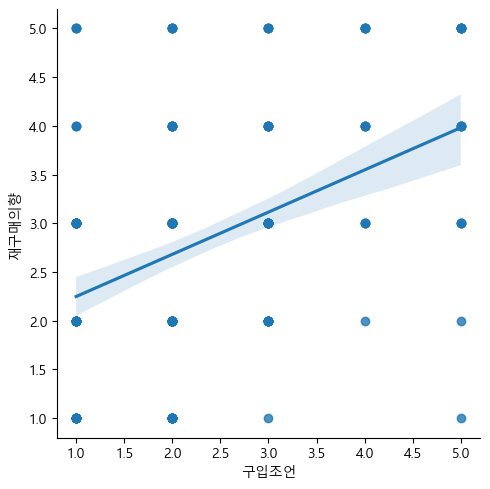

In [122]:
sns.lmplot(y='재구매의향', x='구입조언', data=df)
plt.show()

In [123]:
import numpy as np 
import pandas as pd
import random 

data = {
  "team1" : ["남학균", "김건우","김선규","이예진","임태수"], 
  "team2" : ['정사라', '박태영', '김원', '김지우', '이의준'],
  "team3" : ["최인우", "김율희", "예동완", "김성원", "박민석"],
  'team4' : ['남수형', '이가희', '김현우', '박소현', '성수린'] 
  
}

data

{'team1': ['남학균', '김건우', '김선규', '이예진', '임태수'],
 'team2': ['정사라', '박태영', '김원', '김지우', '이의준'],
 'team3': ['최인우', '김율희', '예동완', '김성원', '박민석'],
 'team4': ['남수형', '이가희', '김현우', '박소현', '성수린']}

In [132]:
set(sum(data.values(),[]))

all_stu = set(sum(data.values(),[]))


In [133]:
data.items()

dict_items([('team1', ['남학균', '김건우', '김선규', '이예진', '임태수']), ('team2', ['정사라', '박태영', '김원', '김지우', '이의준']), ('team3', ['최인우', '김율희', '예동완', '김성원', '박민석']), ('team4', ['남수형', '이가희', '김현우', '박소현', '성수린'])])

In [135]:
data.shape()

AttributeError: 'dict' object has no attribute 'shape'

In [146]:
new_teams = {}
selected = set()

# 2명은 무작위로 운명적 만남, 3명은 다른 팀에서 스카우트

for team, members in data.items():
    # 현재 팀에서 무작위로 2명 남기기
    retained = random.sample(members, 1)
    new_teams[team] = retained
    selected.update(retained)
    
# 3명을 타 팀에서 스카우트
for team in new_teams:
    candidates = list(all_stu - selected)
    scouted_member = random.sample(candidates, 4)
    new_teams[team].extend(scouted_member)
    selected.update(scouted_member)
    
new_teams

{'team1': ['김건우', '김원', '김성원', '이의준', '남학균'],
 'team2': ['김지우', '남수형', '예동완', '박민석', '박태영'],
 'team3': ['김율희', '박소현', '임태수', '최인우', '성수린'],
 'team4': ['김현우', '정사라', '김선규', '이예진', '이가희']}

In [ ]:
{'team1': ['임태수', '남학균', '남수형', '김원', '예동완'],
 'team2': ['이의준', '정사라', '박소현', '김선규', '김현우'],
 'team3': ['김율희', '박민석', '이예진', '김건우', '최인우'],
 'team4': ['성수린', '이가희', '김지우', '김성원', '박태영']}